In [1]:
from google.colab import files
uploaded = files.upload()


Saving Analysis-Portfolio-Task-Data.csv to Analysis-Portfolio-Task-Data.csv
Saving framingham.csv to framingham.csv
Saving sonar.all-data.csv to sonar.all-data.csv


# Ví dụ 3

In [ ]:
import time
import numpy as np

## Nhập dữ liệu

In [ ]:
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)
#target set
print(cancer_data.target)

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

## Chia train/test

In [ ]:
from sklearn.model_selection import train_test_split

cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data,

cancer_data.target,
test_size=0.3,random_state=109)

## Các hàm xây dựng mô hình

In [ ]:
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

def perceptron(X, y, w_init, d):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points
    i = 0
    while i < 300:
        # mix data
        i += 1
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [ ]:
X_train = X_train.T
print(X_train.shape)

(398, 30)


## Train mô hình

In [ ]:
d = X_train.shape[1]
y_train = np.where(y_train == 0, -1, 1).reshape(1, -1)
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train.T, y_train, w_init, d)
print(w[-1])

[[ 4.08043631e+02]
 [ 7.16077372e+02]
 [ 2.48214692e+03]
 [ 3.39578898e+03]
 [ 4.22788960e+00]
 [ 3.65308595e-01]
 [-1.76016624e+00]
 [ 3.14308570e-01]
 [ 8.62725556e+00]
 [ 2.45253809e+00]
 [ 3.31786287e+00]
 [ 5.77501812e+01]
 [ 3.55843183e+00]
 [-9.82902844e+02]
 [ 8.13393818e-01]
 [ 7.76068313e-01]
 [ 1.20185550e+00]
 [-1.62983521e-01]
 [ 1.68673436e-01]
 [-3.51868869e-01]
 [ 3.92332991e+02]
 [ 9.08536333e+02]
 [ 2.35987253e+03]
 [-2.99059788e+03]
 [ 4.52806824e+00]
 [ 1.41227680e+00]
 [-2.07160282e+00]
 [ 1.93073138e+00]
 [ 1.03571291e+01]
 [ 3.83914091e+00]]


## Dự đoán và in ra các kết quả


In [ ]:
y_pred = h(w[-1], X_test.T).reshape(-1)

In [ ]:
y_test = np.where(y_test == 0, -1, 1).reshape(-1)  # Đổi 0 -> -1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.86
Precision: 0.82
Recall: 1.00


## Giảm số chiều về 2 với dữ liệu ở ví dụ 3

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
y = np.array(cancer_data.target)

## Hiển thị dữ liệu đã giảm chiều lên màn hình với dữ liệu ở ví dụ 3

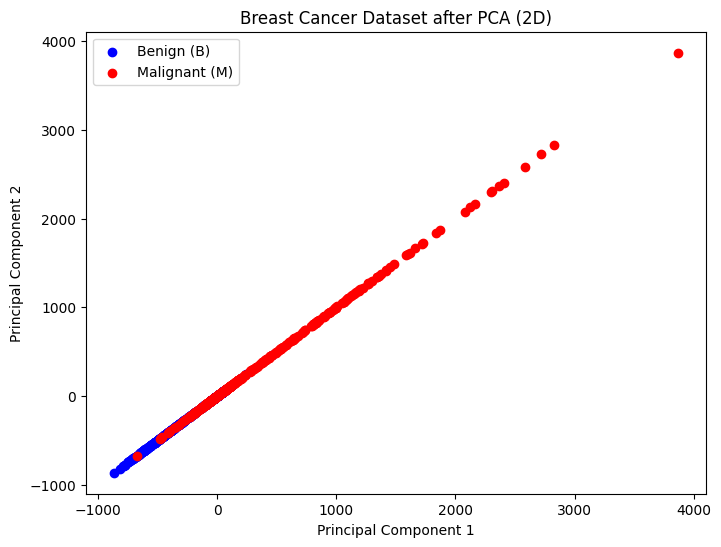

In [ ]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(cancer_data.data)  # X_2d.shape = (569, 2)
plt.figure(figsize=(8,6))
plt.scatter(X_2d[y==1], X_2d[y==1], color='blue', label='Benign (B)')
plt.scatter(X_2d[y==0], X_2d[y==0], color='red', label='Malignant (M)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Breast Cancer Dataset after PCA (2D)')
plt.legend()
plt.show()

## Phân loại bằng mô hình Logistic Regression với dữ liệu ở ví dụ 3

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Khởi tạo và train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_2d, y)  # dùng y gốc 0/1

# Dự đoán
y_log_pred = log_reg.predict(X_2d)

# Độ chính xác
acc_log = accuracy_score(y, y_log_pred)
print("Accuracy Logistic Regression trên dữ liệu 2D:", acc_log)

Accuracy Logistic Regression trên dữ liệu 2D: 0.9332161687170475


## Chạy Perceptron với dữ liệu đã giảm chiều với dữ liệu ở ví dụ 3

In [ ]:
d = X_2d.shape[1]
y_train = np.array(y).reshape(1,-1)
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_2d.T, y_train, w_init, d)
print(w[-1])

[[-163.4096946 ]
 [ 592.42748357]]


In [ ]:
y_pred = h(w[-1], X_2d.T).reshape(-1)

In [ ]:
y_train = y_train.reshape(-1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


## Giảm chiều ở ví dụ 2 và chạy với mô hình Perceptron và Logistic

In [610]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [611]:
# Load dữ liệu
main_df = pd.read_csv('sonar.all-data.csv', header=None)
y_df = main_df[60]
targes_label = {'M': 1,'R': -1}
targes_df = [targes_label[item] for item in y_df]
print(targes_df)
inputs_df = main_df.drop(60, axis=1)
inputs_df = main_df.drop(60, axis=1)
X = main_df.drop(60, axis=1).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Hiển thị dữ liệu sau khi giảm chiều

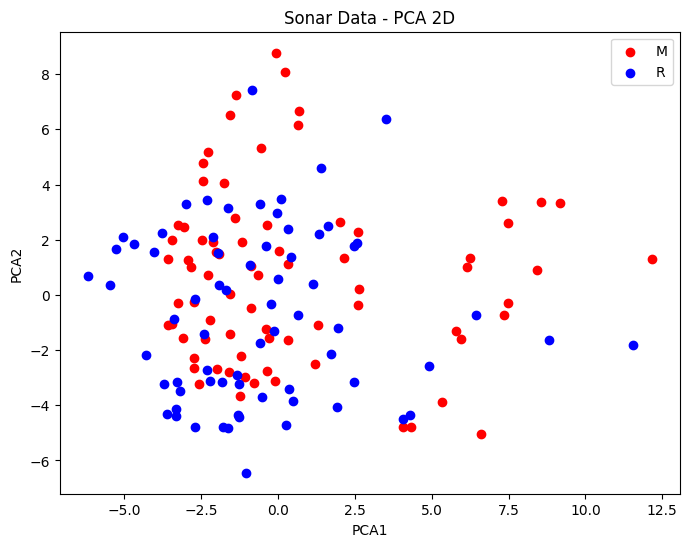

In [612]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Vẽ dữ liệu train với 2 lớp
plt.figure(figsize=(8,6))
plt.scatter(X_train_2d[y_train==1,0], X_train_2d[y_train==1,1], color='r', label='M')
plt.scatter(X_train_2d[y_train==-1,0], X_train_2d[y_train==-1,1], color='b', label='R')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Sonar Data - PCA 2D')
plt.legend()
plt.show()


### Phân loại với mô hình Logistic

In [613]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_2d, y_train)

y_pred_lr = log_reg.predict(X_test_2d)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[18 10]
 [11 24]]


### Phân loại với mô hình Perceptron

In [648]:
def h(w, x):
    return np.sign(np.dot(w.T, x))
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)
def perceptron(X, y, w_init, d):
  w = [w_init]
  N = X.shape[1]
  mis_points = [] # set of miss position points
  i = 0
  while i < 100:
    # mix data
    i += 1
    mix_id = np.random.permutation(N)
    for i in range(N):
      xi = X[:, mix_id[i]].reshape(d, 1)
      yi = y[0, mix_id[i]]
      if h(w[-1], xi)[0] != yi:
        mis_points.append(mix_id[i])
        w_new = w[-1] + yi*xi
        w.append(w_new)
    if has_converged(X, y, w[-1]):
      print(f"Hội tụ sau {i} epoch.") # In ra nếu hội tụ
      break
    if i == 100 and not has_converged(X, y, w[-1]):
        print(f"Đã đạt giới hạn 100 epoch mà KHÔNG hội tụ.")
  return (w, mis_points)

In [651]:
X_train_2d = X_train_2d.T

In [666]:
print(X_train_2d.shape)

(2, 145)


In [667]:
d = X_train_2d.shape[0]
y_train = np.array(y_train).reshape(1,-1)
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train_2d, y_train, w_init, d)
print(w[-1])

[[-0.2699526 ]
 [ 5.42829075]]


In [668]:
y_pred_2 = h(w[-1], X_test_2d.T).reshape(-1)

In [669]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test_2, y_pred_2)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test_2, y_pred_2)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test_2, y_pred_2)
print(f"Recall: {recall:.2f}")

Accuracy: 0.62
Precision: 0.69
Recall: 0.57


# Ví dụ 4

In [409]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Nhập dữ liệu

In [521]:
df = pd.read_csv('framingham.csv')

In [522]:
df = df.dropna().reset_index(drop=True)

In [523]:
X = np.array(df.drop('TenYearCHD', axis=1))
y = np.array(df['TenYearCHD'])  # 0 = không mắc, 1 = mắc CHD trong 10 năm

In [524]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [384]:
print(X_scaled)

[[ 1.11975484 -1.23257968  1.97520875 ...  0.29205038  0.35637003
  -0.20304365]
 [-0.89305263 -0.41490473  0.01924946 ...  0.72500993  1.60846859
  -0.24488308]
 [ 1.11975484 -0.18128332 -0.95873018 ... -0.1089292  -0.06099616
  -0.49591969]
 ...
 [-0.89305263  0.28595951  0.01924946 ... -1.06094821  0.35637003
   1.05213942]
 [ 1.11975484 -1.11576897  0.99722911 ... -0.04496926 -0.72878206
  -0.41224082]
 [-0.89305263 -1.23257968  0.99722911 ... -1.19870806  0.77373621
  -0.07752534]]


## 1) Giảm số chiều dữ liệu xuống còn 2 và hiển thị trực quan

In [414]:
print(y)

[0 0 0 ... 0 0 0]


In [415]:
print(X_scaled.shape)

(3658, 15)


In [416]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [417]:
print("Tỷ lệ phương sai giải thích của 2 thành phần đầu:",
      pca.explained_variance_ratio_)

Tỷ lệ phương sai giải thích của 2 thành phần đầu: [0.21520105 0.12553809]


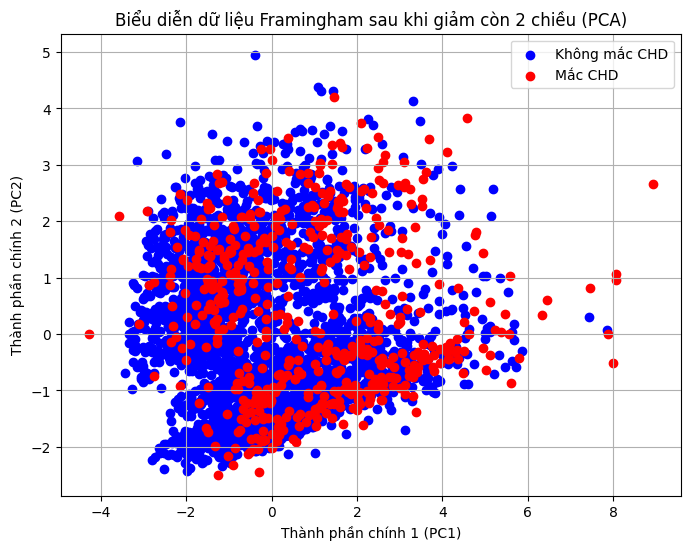

In [418]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='blue', label='Không mắc CHD')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='red', label='Mắc CHD')
plt.title('Biểu diễn dữ liệu Framingham sau khi giảm còn 2 chiều (PCA)')
plt.xlabel('Thành phần chính 1 (PC1)')
plt.ylabel('Thành phần chính 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

## 2) Xử lý dữ liệu, chuyển đổi chia train/test

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Phương pháp Perceptron


In [526]:
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

def perceptron(X, y, w_init, d):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points
    i = 0
    while i < 1000:
        # mix data
        i += 1
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [527]:
X_train = X_train.T

In [528]:
print(X_train.shape)

(15, 2560)


In [529]:
print(np.sum(y_train == 1))

381


In [530]:
d = X_train.shape[0]
y_train = np.where(y_train == 0, -1, 1).reshape(1, -1)  # Đổi 0 -> -1
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train, y_train, w_init, d)
print(w[-1])

[[  14.80991969]
 [ 507.88689494]
 [ -77.40539148]
 [   1.24798852]
 [ 187.09836555]
 [  13.07094822]
 [   2.77600033]
 [  40.95613825]
 [   6.18491897]
 [ -71.05211455]
 [ 511.85864995]
 [-508.31026648]
 [-253.28164731]
 [-783.38143423]
 [  89.22804212]]


In [531]:
y_pred = h(w[-1], X_test.T).reshape(-1)

In [532]:
y_test = np.where(y_test == 0, -1, 1).reshape(-1)  # Đổi 0 -> -1

In [533]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.84
Precision: 0.44
Recall: 0.11


### Phương pháp Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
lg = LogisticRegression(max_iter=10000)
model = lg.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.85
Precision: 0.75
Recall: 0.07


### Phương pháp Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gb.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.81
Precision: 0.34
Recall: 0.16


## 3) Thực hiện với dữ liệu đã giảm chiều

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

### Phương pháp Perceptron

In [ ]:
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

def perceptron(X, y, w_init, d):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points
    i = 0
    while i < 1000:
        # mix data
        i += 1
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi * xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [ ]:
X_train = X_train.T
print(X_train.shape)

(2, 2560)


In [ ]:
d = X_train.shape[0]
y_train = np.where(y_train == 0, -1, 1).reshape(1, -1)  # Đổi 0 -> -1
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train, y_train, w_init, d)
print(w[-1])

[[-0.00644286]
 [ 0.28989908]]


In [ ]:
y_pred = h(w[-1], X_test.T).reshape(-1)

In [ ]:
y_test = np.where(y_test == 0, -1, 1).reshape(-1)  # Đổi 0 -> -1

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.56
Precision: 0.18
Recall: 0.49


### Phương pháp Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [ ]:
lg = LogisticRegression(max_iter=10000)
model = lg.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.84
Precision: 0.57
Recall: 0.02


### Phương pháp Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gb.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.84
Precision: 0.40
Recall: 0.06


### => Mô hình chịu ảnh hưởng nhiều nhất khi giảm chiều là mô hình Perceptron

# Ví dụ 5

In [438]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Nhập dữ liệu

In [479]:
df = pd.read_csv("Analysis-Portfolio-Task-Data.csv")
df.head()

,CustomerID,Shopping Basket,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products
0,20358063,48.81,Male,26,Convenient Stores,8,2,1
1,24635139,33.44,Female,33,Superstore,6,5,1
2,27584479,131.57,Male,56,Online,35,8,12
3,28008212,20.02,Male,27,Convenient Stores,0,1,1
4,29130973,95.54,Female,55,Online,38,18,20


## 1) Chuẩn hóa và dự đoán với mô hình Linear Regression

In [480]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
store_dummies = pd.get_dummies(df['Store Type'], prefix='Store', dtype=int)
df = pd.concat([df, store_dummies], axis=1)
df.drop(columns=['Store Type', 'CustomerID'], inplace=True)

In [481]:
X = df.drop(columns=['Shopping Basket'], axis=1)
y = df['Shopping Basket']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size = 60, random_state=42
)

In [474]:
print(df['Gender'])

0     0
1     1
2     0
3     0
4     1
     ..
70    1
71    1
72    1
73    1
74    0
Name: Gender, Length: 75, dtype: int64


In [475]:
print(df['Store_Convenient Stores'])

0     1
1     0
2     0
3     1
4     0
     ..
70    0
71    0
72    0
73    0
74    0
Name: Store_Convenient Stores, Length: 75, dtype: int64


In [476]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression:")
print("R2:", r2)
print("MSE:", mse)
print("MAE", mae)

Linear Regression:
R2: 0.686373122516152
MSE: 490.1188658767941
MAE 16.174650711287985


R² = 0.68 → Mô hình tuyến tính giải thích được khoảng 68% biến thiên dữ liệu, khá tốt nhưng vẫn còn khoảng 28% biến thiên chưa được mô hình dự đoán chính xác.

MSE = 490.11 → Trung bình bình phương sai số là ~490, tức dự đoán lệch thực tế khoảng √490 ≈ 23 đơn vị, cho thấy mô hình có một số sai số lớn.

MAE = 16.17 → Trung bình dự đoán sai khoảng 16 đơn vị, mức sai số trung bình này tương đối chấp nhận được nếu biến mục tiêu có phạm vi lớn.

## 2) Xây dựng các mô hình với y là Shopping Basket

### Mô hình Perceptron

In [482]:
X = np.array(X)
y_perceptron = np.where(y > 50, 1, -1)

In [483]:
print(X.shape)

(75, 8)


In [484]:
print(y_perceptron)

[-1 -1  1 -1  1 -1  1 -1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1
 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1 -1
  1 -1 -1  1 -1  1  1  1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1
  1  1  1]


In [485]:
X_train, X_test, y_train, y_test = train_test_split(X, y_perceptron, train_size=60, random_state=42)

In [486]:
X_train = X_train.T
y_train = y_train.reshape(1, -1)

In [487]:
print(X_train.shape)

(8, 60)


In [496]:
def h(w, x):
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    return np.array_equal(h(w, X), y)

def perceptron(X, y, w_init, d):
    w = [w_init]
    N = X.shape[1]
    mis_points = []  # set of miss position points
    i = 0
    while i < 10000:
        # mix data
        i += 1
        mix_id = np.random.permutation(N)
        for j in range(N):
            xi = X[:, mix_id[j]].reshape(d, 1)
            yi = y[0, mix_id[j]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[j])
                w_new = w[-1] + yi * xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

In [497]:
d = X_train.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train, y_train, w_init, d)
print(w[-1])

[[ -218.221465  ]
 [  -13.05449492]
 [   86.42586617]
 [  305.70769368]
 [  -17.94621777]
 [-4057.84036442]
 [ 1145.45845764]
 [-2131.71611396]]


In [498]:
y_pred = h(w[-1], X_test.T).reshape(-1)

In [499]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.93
Precision: 0.90
Recall: 1.00


Accuracy = 0.93 → 93% số dự đoán của mô hình là đúng.

Tức là trong tất cả các mẫu test, 93% được phân loại chính xác vào đúng nhóm (>50 hoặc ≤50).

Precision = 0.90 → Tỉ lệ dự đoán dương tính đúng trên tổng số dự đoán dương tính.

Ở đây “dương tính” có thể là Shopping Basket > 50.

90% các dự đoán >50 của mô hình là chính xác, 10% còn lại là false positives (dự đoán >50 nhưng thực tế ≤50).

Recall = 1.00 → Tỉ lệ mẫu dương tính được mô hình dự đoán đúng trên tổng số mẫu dương tính thực tế.

100% các khách hàng thực sự mua >50 món đều được mô hình dự đoán ra.

Không có mẫu false negatives (khách >50 mà dự đoán ≤50).

### Mô hình Logistic Regression

In [543]:
df = pd.read_csv("Analysis-Portfolio-Task-Data.csv")
df.head()

,CustomerID,Shopping Basket,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products
0,20358063,48.81,Male,26,Convenient Stores,8,2,1
1,24635139,33.44,Female,33,Superstore,6,5,1
2,27584479,131.57,Male,56,Online,35,8,12
3,28008212,20.02,Male,27,Convenient Stores,0,1,1
4,29130973,95.54,Female,55,Online,38,18,20


In [544]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
store_dummies = pd.get_dummies(df['Store Type'], prefix='Store', dtype=int)
df = pd.concat([df, store_dummies], axis=1)
df.drop(columns=['Store Type', 'CustomerID'], inplace=True)

In [545]:
X = df.drop(columns=['Shopping Basket'], axis=1)
y = df['Shopping Basket']

In [546]:
y_perceptron = np.where(y > 50, 1, 0)

In [549]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_perceptron, train_size = 60, random_state=42
)

In [550]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [553]:
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
 [[6 0]
 [0 9]]


### Mô hình Naive Bayes

In [554]:
from sklearn.naive_bayes import GaussianNB

In [555]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [556]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [557]:
y_pred = gnb.predict(X_test_scaled)

In [558]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8
Precision: 1.0
Recall: 0.6666666666666666
Confusion Matrix:
 [[6 0]
 [3 6]]


Accuracy = 0.8 → 80% số dự đoán là đúng.

Trong tổng số các mẫu test, 20% bị dự đoán sai.

Precision = 1.0 → Tất cả các dự đoán “dương tính” (Shopping Basket >50) đều đúng.

Không có false positives.

Khi mô hình dự đoán khách mua >50, bạn hoàn toàn có thể tin tưởng.

Recall = 0.6667 → Chỉ 2/3 số khách hàng thực sự >50 được dự đoán ra.

Có 1/3 khách hàng >50 bị bỏ sót (false negatives).